# Genarate Dataset

In [3]:
import numpy as np

np.random.seed(0)
x = 1 + 2 * np.random.normal(0, 1, 1000)
y = x + 1.5 * (x ** 2) + 0.8 * (x ** 3) + np.random.normal(0, 3, 1000)

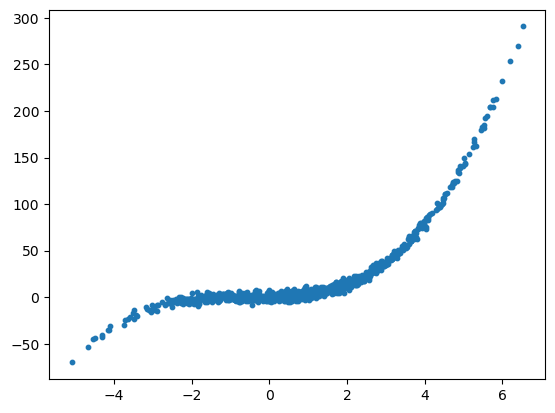

In [6]:
import matplotlib.pyplot as plt

plt.scatter(x, y, s = 10)
plt.show()

# Split the Dataset into 3 Sets

### 01. Training Set 
### 02. Validation Set
### 03. Test Set

In [8]:
from sklearn.model_selection import train_test_split

x = x[:, np.newaxis]
y = y[:, np.newaxis]

# Split data into 80% train, 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

#Split train data into 75% train, 25% validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

## Train a Simple Linear Regression Model

In [10]:
from sklearn.linear_model import LinearRegression

x_train = x_train.reshape(-1, 1)
x_val = x_val.reshape(-1, 1)

lin_reg_1 = LinearRegression()
lin_reg_1.fit(x_train, y_train)

print("Degree 1 - Training Error : ", lin_reg_1.score(x_train, y_train))
print("Degree 1 - Validation Error : ", lin_reg_1.score(x_val, y_val))

Degree 1 - Training Error :  0.6112766542009314
Degree 1 - Validation Error :  0.578092525888924


## Train Plynomial Regression Models

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly_regre = PolynomialFeatures(degree = 2)
x_poly2 = poly_regre.fit_transform(x_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly2, y_train)

LinearRegression()

In [17]:
x_poly_val2 = poly_regre.fit_transform(x_val)

print("Degree 2 - Training Error : ", lin_reg_2.score(x_poly2, y_train))
print("Degree 2 - Validation Error : ",lin_reg_2.score(x_poly_val2,y_val))

Degree 2 - Training Error :  0.8901821639950546
Degree 2 - Validation Error :  0.8567139925783426


In [18]:
poly_regre = PolynomialFeatures(degree = 3)
x_poly3 = poly_regre.fit_transform(x_train)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(x_poly3, y_train)

LinearRegression()

In [19]:
x_poly_val3 = poly_regre.fit_transform(x_val)

print("Degree 3 - R2 score : ", lin_reg_3.score(x_poly3, y_train))
print("Degree 3 - R2 score : ",lin_reg_3.score(x_poly_val3,y_val))

Degree 3 - R2 score :  0.9941068693023871
Degree 3 - R2 score :  0.9941018868235563


In [20]:
poly_regre = PolynomialFeatures(degree = 20)
x_poly = poly_regre.fit_transform(x_train)
lin_reg_20 = LinearRegression()
lin_reg_20.fit(x_poly, y_train)

LinearRegression()

In [22]:
x_poly_val20 = poly_regre.fit_transform(x_val)

print("Degree 2 - R2 score : ", lin_reg_20.score(x_poly, y_train))
print("Degree 1 - R2 score : ",lin_reg_20.score(x_poly_val20,y_val))

Degree 2 - R2 score :  0.9941899799728862
Degree 1 - R2 score :  0.6561853720496542


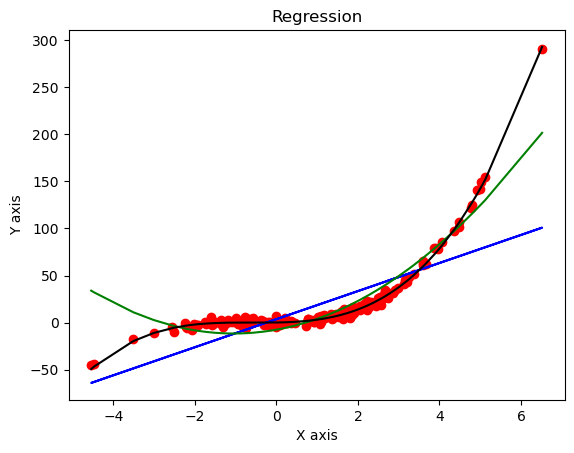

In [23]:
plt.scatter(x_val, y_val, color= 'red')
plt.plot(x_val, lin_reg_1.predict(x_val), color = 'blue')

x2 , y2 = zip(*sorted(zip(x_val, lin_reg_2.predict(x_poly_val2)), key = lambda x: x[0]))
plt.plot(x2, y2, color = 'green')

x3, y3 =  zip(*sorted(zip(x_val, lin_reg_3.predict(x_poly_val3)), key = lambda x: x[0]))
plt.plot(x3, y3, color = 'black')

plt.title('Regression')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()